<h4>pca intuition:</h4>
<p>https://www.youtube.com/watch?v=BfTMmoDFXyE</p>
<p>https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues</p>

In [16]:
import h2o
from h2o.estimators.pca import H2OPrincipalComponentAnalysisEstimator
h2o.init()
import matplotlib.pyplot as plt

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,5 mins 22 secs
H2O_cluster_timezone:,Europe/Vienna
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,2 months and 18 days
H2O_cluster_name:,H2O_from_python_gerd_er2izt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.867 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [7]:
url = 'http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv'
iris = h2o.import_file(url)
train, test = iris.split_frame([0.8], seed=69)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [42]:
# Train with the Power pca_method
pca = H2OPrincipalComponentAnalysisEstimator(k = 4, transform = "STANDARDIZE", pca_method="Power",
                   use_all_factor_levels=True, impute_missing=True)

pca.train(x=list(range(4)), training_frame=train)

pca Model Build progress: |███████████████████████████████████████████████| 100%


In [43]:
pca

Model Details
H2OPrincipalComponentAnalysisEstimator :  Principal Components Analysis
Model Key:  PCA_model_python_1626611505366_13


Importance of components: 


,,pc1,pc2,pc3,pc4
0,Standard deviation,1.696073,0.983907,0.366517,0.144663
1,Proportion of Variance,0.719166,0.242018,0.033584,0.005232
2,Cumulative Proportion,0.719166,0.961185,0.994768,1.000000




ModelMetricsPCA: pca
** Reported on train data. **

MSE: NaN
RMSE: NaN

Scoring History from Power SVD: 


,,timestamp,duration,iterations,err,principal_component_
0,,2021-07-18 15:02:13,0.008 sec,0.0,7.132151e-01,1.0
1,,2021-07-18 15:02:13,0.008 sec,1.0,9.234428e-01,1.0
2,,2021-07-18 15:02:13,0.008 sec,2.0,4.734008e-01,1.0
3,,2021-07-18 15:02:13,0.008 sec,3.0,1.693756e-01,1.0
4,,2021-07-18 15:02:13,0.008 sec,4.0,5.741025e-02,1.0
5,,2021-07-18 15:02:13,0.008 sec,5.0,1.933585e-02,1.0
6,,2021-07-18 15:02:13,0.008 sec,6.0,6.507628e-03,1.0
7,,2021-07-18 15:02:13,0.008 sec,7.0,2.190012e-03,1.0
8,,2021-07-18 15:02:13,0.008 sec,8.0,7.369978e-04,1.0
9,,2021-07-18 15:02:13,0.008 sec,9.0,2.480193e-04,1.0



See the whole table with table.as_data_frame()


In [44]:
# View the importance of components
pca.varimp(use_pandas=False)

# View the eigenvectors
#pca.rotation()

[('Standard deviation',
  1.696073279642128,
  0.9839073673371476,
  0.36651660499210476,
  0.14466271409296466),
 ('Proportion of Variance',
  0.7191661424790007,
  0.242018426875079,
  0.03358360543373461,
  0.0052318252121857055),
 ('Cumulative Proportion',
  0.7191661424790007,
  0.9611845693540797,
  0.9947681747878143,
  1.0)]

In [45]:
pred = H2OPrincipalComponentAnalysisEstimator.predict(pca, train)

pca prediction progress: |████████████████████████████████████████████████| 100%


In [46]:
pred

PC1,PC2,PC3,PC4
2.21639,-0.634445,0.103615,-0.00638482
2.08208,0.596561,0.199634,-0.0965737
2.3476,0.213984,-0.0767164,-0.0184542
2.29341,0.484427,-0.12601,0.0718369
2.40909,-0.214095,-0.36265,0.0494994
2.19504,-0.364321,0.0622288,0.0390523
2.34922,1.02371,-0.185059,0.0281493
2.17611,0.373218,0.218973,0.0475708
2.09667,-1.21307,0.250467,0.00626779
2.29003,-0.285326,-0.121286,0.145976


<h3>plot the data in 2D scatterplot</h3>

In [47]:
pred = pred.as_data_frame()

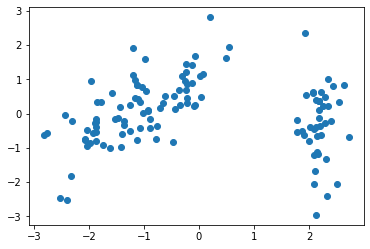

In [48]:
plt.scatter(pred.PC1, pred.PC2)